In [1]:
import io
import sys
PATH = "D:/OneDrive - Universidad Tecnológica de Bolívar/Apps/NaturalLanguageProcessing-MING-2903/"
DIR_DATA = PATH + "data/"
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from logic.text_processing import TextProcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [2]:
tp = TextProcessing()
le = LabelEncoder()

In [3]:
raw_data = pd.read_csv(DIR_DATA + 'TASS2018.csv', sep=';')
raw_data

,tweetid,user,content,date,lang,polarity
0,770976639173951488,noseashetero,@noseashetero 1000/10 de verdad a ti que voy a...,31/08/2016 13:28,es,P
1,771092421866389508,Templelx,@piscolabisaereo @HistoriaNG @SPosteguillo las...,31/08/2016 21:08,es,P
2,771092111429083136,esskuu94,"Al final han sido 3h Bueno, mañana tengo fies...",31/08/2016 21:07,es,P
3,771092070572449796,__ariadna9,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,31/08/2016 21:07,es,N
4,771094192508600320,_cristtina15_,@_MissChaotic_ ves ese brillo? es un coso que ...,31/08/2016 21:15,es,N
...,...,...,...,...,...,...
501,757593585634213888,RubenRuCh,@Davorias Pero es que está muy rica,25/07/2016 15:09,es,P
502,757585725764362240,rayjaken,@narvalillo Eso es antiguo ya,25/07/2016 14:38,es,N
503,757097408304148480,Fuhyo__,Mi TL esta vacía a estas horas,24/07/2016 6:17,es,N
504,757971881077182464,xLytherinDovah,"Ya tengo uno, pero ese es más cheto @aweamasome.",26/07/2016 16:12,es,NEU


In [4]:
y = raw_data['polarity']
y

0        P
1        P
2        P
3        N
4        N
      ... 
501      P
502      N
503      N
504    NEU
505      N
Name: polarity, Length: 506, dtype: object

In [5]:
corpus = [tp.transformer(row) for row in raw_data['content'].tolist()]
len(corpus), len(y)

(506, 506)

In [6]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 3), lowercase=True, token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [7]:
bow.fit(corpus)

CountVectorizer(ngram_range=(1, 3), token_pattern='[a-zA-Z][a-zA-Z]{3,}')

In [8]:
x = bow.transform(corpus).toarray()

In [9]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
df = pd.DataFrame(x, index=['content '+str(i) for i in range(1, 1+len(corpus))], columns=bow.get_feature_names())

In [11]:
df

,aaaa,aaaa estoy,aaaa estoy cansada,abarcar,abarcar mucho,abedul,abedul gigante,abedul gigante habia,abel,abel quien,...,youtube ahora puedo,zack,zack holman,zack holman tambien,zona,zona entreno,zona entreno escogieron,zonas,zonas limitrofes,zonas limitrofes pero
content 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content 502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
content 505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
gnb = GaussianNB()

In [14]:
gnb.fit(x_train, y_train)

GaussianNB()

In [15]:
Counter(y_test)

Counter({'NONE': 22, 'N': 74, 'P': 39, 'NEU': 17})

In [16]:
y_predict = gnb.predict(x_test)
y_predict

array(['NONE', 'N', 'NEU', 'NEU', 'NEU', 'N', 'NEU', 'P', 'N', 'NONE',
       'P', 'NONE', 'P', 'NEU', 'N', 'NEU', 'P', 'N', 'P', 'P', 'N', 'N',
       'N', 'P', 'N', 'N', 'P', 'P', 'NEU', 'NONE', 'P', 'NEU', 'P', 'P',
       'N', 'NEU', 'P', 'N', 'N', 'P', 'NONE', 'N', 'NONE', 'P', 'NEU',
       'N', 'NONE', 'P', 'N', 'NEU', 'P', 'N', 'N', 'NEU', 'N', 'NONE',
       'P', 'NEU', 'P', 'N', 'P', 'P', 'P', 'P', 'NEU', 'P', 'P', 'N',
       'N', 'NONE', 'N', 'NEU', 'N', 'NEU', 'N', 'P', 'P', 'N', 'P',
       'NONE', 'N', 'P', 'P', 'P', 'P', 'N', 'NONE', 'NONE', 'P', 'NONE',
       'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'N', 'NONE',
       'N', 'P', 'NONE', 'NEU', 'P', 'P', 'N', 'NEU', 'N', 'NEU', 'P',
       'N', 'NEU', 'N', 'P', 'N', 'NEU', 'NEU', 'P', 'P', 'P', 'NEU', 'P',
       'P', 'P', 'NONE', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'P', 'N', 'P',
       'N', 'N', 'NEU', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
      dtype='<U4')

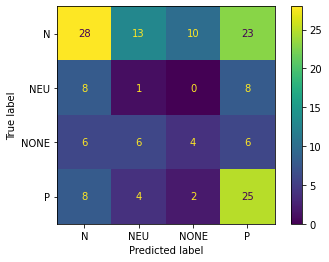

In [17]:
plot_confusion_matrix(gnb, x_test, y_test) 
plt.show()  

In [ ]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)